# Latar Belakang
Dataset ini berisikan klaim kehilangan barang, kerusakan barang, dan keluhan-keluhan lain yang diajukan oleh pengguna maskapai penerbangan terhadap Terminal Security Agency (TSA) pada bandara - bandara di US.

## Pernyataan Masalah
**Bagaimana gambaran servis bandara di US yang dilakukan oleh Terminal Security Agency(TSA) dari tahun 2002 sampai tahun 2015?**


### Import library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, f_oneway
import re

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait klaim barang yang terjadi di bandara di US yang ditangani oleh US Terminal Security Agnecy (TSA). Ada 13 kolom di dalam dataset tsa_claims, yaitu:  

* Claim Number : Nomor unik untuk tiap claim
* Date Received	: Tanggal ketika TSA menerima laporan klaim
* Incident Date	 : Tanggal ketika insiden kerusakan/kehilangan kira-kira terjadi
* Airport Code	: Code unik yang dimiliki masing - masing Airport  (cth : Los Angeles Airport = LAX)
* Airport Name	: Nama Airport
* Airline Name	: Nama maskapai penerbangan
* Claim Type	: Tipe Claim
* Claim Site	 : Tempat dimana pengeluh menerima barang yang diduga rusak atau seharusnya ditemukan namun ternyata hilang
* Item : Barang yang dikeluhkan
* Claim Amount	: Jumlah ganti rugi yang dimintakan oleh pengeluh
* Status : Status ganti rugi
* Close Amount	: Jumlah ganti rugi yang sudah dibayar dan disetujui oleh TSA
* Disposition : Hasil kesepakatan final antara TSA dengan pengeluh


Berikut 5 baris teratas dan terbawah dari dataset tsa_claims.

In [2]:
df = pd.read_csv('tsa_claims.csv')
display(df.head(),df.tail())

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (204267, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


Mengubah data yang hanya berupa simbol - menjadi nan

In [4]:
df = df.replace('-',np.nan)
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,NaN,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_colwidth', -1)

# data unik di tiap kolom

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   Claim Number   204258             
1   Date Received  4007               
2   Incident Date  26807              
3   Airport Code   464                
4   Airport Name   484                
5   Airline Name   317                
6   Claim Type     10                 
7   Claim Site     5                  
8   Item           4703               
9   Claim Amount   36116              
10  Status         14                 
11  Close Amount   17162              
12  Disposition    3                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Secara umum, kita bisa melihat bahwa:
* Dataset tsa_claims memiliki 13 kolom dan 204.267 baris
* Semua kolom kecuali kolom `Claim Number` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* Kolom `Claim Number` berisikan id unik untuk tiap keluhan, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* Kolom `Date Received` dan kolom `Incident Date` memiliki data tipe object. Dari penjelasannya, kolom ini seharusnya berisikan data Date/Time Harus diubah.
* Beberapa data pada kolom `Incident Date` memiliki keterangan waktu juga, bisa kita pisah dan kita buat kolom baru. Siapa tahu berguna. 
* Kolom `Claim Amount` dan `Close Amount` memiliki data tipe object. Kolom ini seharusnya berisikan data float karena memiliki angka desimal. Harus diubah
* Kolom `Claim Amount` dan `Close Amount` memiliki tanda `$` didalamnya sehingga tidak bisa diutak - atik datanya. Tanda tersebut harus kita split dan kita buang.
* Kolom `Airport Code` dan `Airport Name` memiliki missing data yang sama. Bisa kita isi bersamaan dengan value yang sama juga.
* Kolom `Airport Name` terkadang berisikan nama airport yang maksudnya sama namun pengejaannya berbeda. Harus dirapikan.

### Waw banyak sekali datanya!! Mari kita lihat berapa banyak data yang tidak memiliki values (NaN)

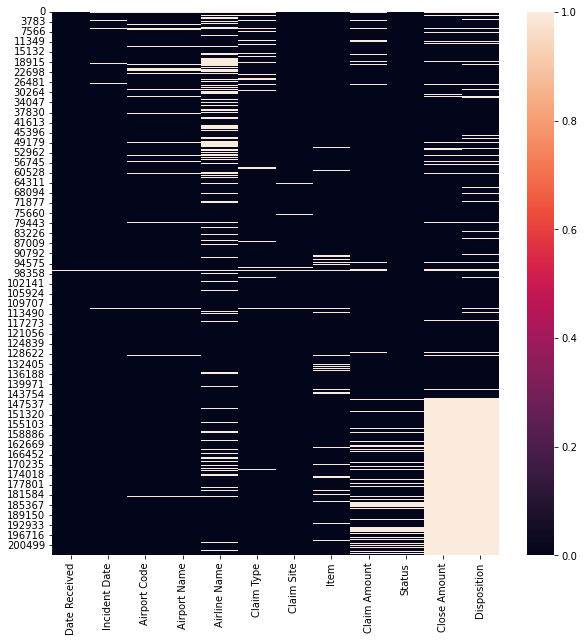

In [6]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Date Received','Incident Date','Airport Code','Airport Name',
'Airline Name','Claim Type','Claim Site','Item','Claim Amount','Status',
'Close Amount','Disposition']].isna());

In [7]:
df.shape[0]*df.shape[1]

2655471

Total ada 2.655.471 data (kosong dan terisi)

In [8]:
df.isna().sum().sum()

248009

Total jumlah data yang kosong sebesar 248.009

In [9]:
((df.isna().sum().sum())/(df.shape[0]*df.shape[1]))*100

9.339548426625633

Persentase data kosong 9.33 % dari seluruh data

In [10]:
df.isna().sum()/len(df)

Claim Number     0.000000
Date Received    0.001288
Incident Date    0.010687
Airport Code     0.043889
Airport Name     0.043889
Airline Name     0.189071
Claim Type       0.040119
Claim Site       0.004974
Item             0.041069
Claim Amount     0.082221
Status           0.062453
Close Amount     0.337558
Disposition      0.356925
dtype: float64

### Waw banyak sekali data kosongnya (NaN). Ada 248.009 data yang kosong. 
Ada 2 cara untuk menangani *missing value*:
* Pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini bisa kita pakai, karena jumlah missing value yang tergolong tidak terlalu tinggi total 9.3 %.
* Kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*.

Mari Kita hapus baris baris yang memiliki kolom kosong lebih dari 3 dengan menggunakan df.dropna
- Baris yang tidak memiliki kolom terisi lebih dari 10 maka akan dibuang

In [11]:
# thresh 10 berarti harus ada minimal 10 kolom yang tidak kosong

df = df.dropna(axis = 0, thresh = 10)

Melihat total data setelah dipangkas

In [12]:
df.shape[0]*df.shape[1]

2403310

Total ada 2.403.310 data (kosong dan terisi)

In [13]:
df.isna().sum()

Claim Number     0    
Date Received    108  
Incident Date    341  
Airport Code     3426 
Airport Name     3426 
Airline Name     31520
Claim Type       5460 
Claim Site       291  
Item             5642 
Claim Amount     1528 
Status           0    
Close Amount     50980
Disposition      54481
dtype: int64

Melihat total data kosong setelah dipangkas

In [14]:
df.isna().sum().sum()

157203

Setelah dipangkas, data yang kosong masih sebesar 157.203

In [15]:
(df.isna().sum().sum())/(df.shape[0]*df.shape[1])*100

6.541103727775443

Total ada 6.54 % data kosong dari seluruh data walaupun sudah didrop berdasarkan threshold 3 data kosong dalam 1 baris 

## Merapikan kolom secara lebih mendalam
Sekarang, mari kita lihat rapikan kolom Status

Terdapat beragam values yang diantaranya inkonsisten seperti Denied dan Deny, kemudian yang lainnya adalah claim yang tidak terselesaikan seperti -, Insufficient, In litigation.

In [16]:
df['Status'].str.split(";").map(lambda x: "Null" if type(x)==float else x[0]).value_counts()

Denied                                               67952
Approved                                             34717
Deny                                                 28087
Settled                                              27665
Approve in Full                                      12233
Settle                                               5729 
Canceled                                             5282 
Insufficient                                         1847 
Closed as a contractor claim                         1253 
In litigation                                        94   
In review                                            9    
Claim has been assigned for further investigation    1    
Pending response from claimant                       1    
Name: Status, dtype: int64

### Sekarang mari kita rapikan pengejaan yang inkonsisten di kolom status dan menghilangkan status yang tidak final

In [17]:
valid_targets = ['Denied','Approved','Deny','Settled','Approve in Full', 'Settle']

df = df[df['Status'].isin(valid_targets)]
df['Status'].replace('Approve in Full','Approved',inplace=True)
df['Status'].replace('Deny','Denied',inplace=True)
df['Status'].replace('Settle','Settled',inplace=True)

print(df['Status'].value_counts())
print(len(df))

Denied      96039
Approved    46950
Settled     33394
Name: Status, dtype: int64
176383


### Permasalahan di kolom Status sudah selesai!!

### Sekarang kita akan merapikan kolom Date Received dan kolom Date Time

In [18]:
df.dropna(subset=["Date Received"], inplace=True)

df["Date Received"] = pd.to_datetime(df['Date Received'],format="%d-%b-%y")

df = df[df['Date Received'].dt.year.isin(range(2002,2014+1))]

print(df['Date Received'].dt.year.value_counts().sort_index())

2002    768  
2003    18625
2004    26466
2005    22479
2006    17657
2007    17381
2008    15247
2009    11593
2010    9693 
2011    9746 
2012    8817 
2013    6175 
2014    5067 
Name: Date Received, dtype: int64


In [19]:
# Membuat function yang berfungsi untuk formatting Incident Date menjadi lebih rapi dan berformat Day/Month/Year semua

month_dict = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}

def format_dates(regex, date_string):
    '''
    Format the date string from 2014 entries to be consistent with the rest of the doc 
    Inputs: 
        regex - compiled re with three groups corresponding to {day}/{month (abbrev.)}/{Year}
        date - string to be formatted matching the regex
    Outputs: 
        If regex match, return formatted string of form {Month}/{Day}/{Year}; else return original string
    '''
    m = regex.match(date_string)
    if(m):
        day, month, year = m.group(1,2,3)
        return "{}/{}/{}".format(month_dict[month],day,"20"+year)
    else:
        return date_string


### Incident Date terdiri dari tanggal dan jam. Kita akan memisahkan waktu dengan tanggalnya.

In [20]:
df.dropna(subset=['Incident Date'], inplace=True)

df['Incident Date'].replace("6/30/10","06/30/2010 16:30",inplace=True)

df['Incident Date'] = df['Incident Date'].str.replace("-","/")
df['Incident Date'] = df['Incident Date'].str.lower()

df["Incident Time"] = df['Incident Date'].str.split(" ").map(lambda x: x[-1])
df["Incident Date"] = df['Incident Date'].str.split(" ").map(lambda x: x[0])

regex = re.compile(r"/[a-z]{3}/[0-9]{4}")
df = df[df['Incident Date'].map(lambda x: not bool(regex.search(x)))].sort_values(["Date Received"])

regex = re.compile(r"(\d*)/([a-z]{3})/(1[1-4])$")
df["Incident Date"] = df['Incident Date'].map(lambda x: format_dates(regex,x) )

df["Incident Date"] = pd.to_datetime(df['Incident Date'],format="%m/%d/%Y")
df = df[df['Incident Date'].dt.year.isin(range(2002,2014+1))]

print(df['Incident Date'].dt.year.value_counts().sort_index())
print(len(df))

2002    1616 
2003    21534
2004    26099
2005    21199
2006    17432
2007    17073
2008    14768
2009    10078
2010    10832
2011    9782 
2012    8692 
2013    5943 
2014    4257 
Name: Incident Date, dtype: int64
169305


## Permasalah Incident Date, Date Received, dan Incident Time sudah selesai!! Namun kita akan menghapus kolom Incident Time karena ga guna

In [21]:
## Kolom Incident Time apus ajalah, ga gunaaaaaa bgst!!!!
df.drop('Incident Time', inplace = True, axis = 1)

### Sekarang mari kita rapikan kolom airport code dan airport name. Kedua kolom ini memiliki missing data yang sama. Maka dari itu seharusnya keduanya berkaitan satu sama lain

In [22]:
# Memeriksa nama airport yang spellingnya beda tapi maksudnya sama lalu diassigned kedalam airport code yang sama
 
temp = df.groupby('Airport Code')['Airport Name'].nunique().sort_values(ascending=False)
print(df[df['Airport Code'].isin(temp[temp>1].index)].groupby('Airport Code')['Airport Name'].unique().head())


# Duplicates are from excess spaces

df['Airport Code'] = df['Airport Code'].str.strip()
df['Airport Name'] = df['Airport Name'].str.strip()

Airport Code
BOS    [Boston (Logan) International Airport, Boston (Logan) International Airport ]      
BUR    [Bob Hope, Bob Hope ]                                                              
DEN    [Denver International Airport, Denver International Airport ]                      
DFW    [Dallas-Fort Worth International Airport, Dallas-Fort Worth International Airport ]
DUJ    [Dubois Jefferson County, Dubois Jefferson County ]                                
Name: Airport Name, dtype: object


In [23]:
df['Airline Name'] = df['Airline Name'].str.strip().str.replace(' ','')
df['Airline Name'].replace('AmericanEagle','AmericanAirlines',inplace=True)
df['Airline Name'].replace('AmericanWest','AmericaWest',inplace=True)
df['Airline Name'].replace('AirTranAirlines(donotuse)','AirTranAirlines',inplace=True)
df['Airline Name'].replace('AeroflotRussianInternational','AeroFlot',inplace=True)
df['Airline Name'].replace('ContinentalExpressInc','ContinentalAirlines',inplace=True)
df['Airline Name'].replace('Delta(Song)','DeltaAirLines',inplace=True)
df['Airline Name'].replace('FrontierAviationInc','FrontierAirlines',inplace=True)
df['Airline Name'].replace('NorthwestInternationalAirwaysLtd','NorthwestAirlines',inplace=True)
df['Airline Name'].replace('SkywestAirlinesAustralia','SkywestAirlinesIncUSA',inplace=True)

df['Airline Name'].value_counts().head(10)

DeltaAirLines          21713
AmericanAirlines       20561
SouthwestAirlines      16675
UAL                    16317
USAir                  11407
ContinentalAirlines    10678
NorthwestAirlines      8629 
JetBlue                5949 
AlaskaAirlines         5548 
AirTranAirlines        4048 
Name: Airline Name, dtype: int64

### Permasalahan kolom duplikat di airline name sudah selesai!! Namun masih banyak Airport Code dan Airport Name yang NaN

In [24]:
df.isna().sum()

Claim Number     0    
Date Received    0    
Incident Date    0    
Airport Code     3368 
Airport Name     3368 
Airline Name     29431
Claim Type       5016 
Claim Site       263  
Item             4757 
Claim Amount     228  
Status           0    
Close Amount     40837
Disposition      39537
dtype: int64

### Karena saya sudah bingung yang dikarenakan oleh Airport Code, Airport Name, dan Airline Name banyak sekali data missing yang tidak bisa ditracking, jadi keduanya saya isi dengan modus saja. Kenapa saya isi dengan modus? Karena ketiga kolom tersebut merupakan data kategorikal (Nominal).

In [25]:
df['Airport Code'] = df['Airport Code'].fillna(df['Airport Code'].mode()[0])
df['Airport Name'] = df['Airport Name'].fillna(df['Airport Name'].mode()[0])
df['Airline Name'] = df['Airline Name'].fillna(df['Airline Name'].mode()[0])

### Permasalahan Airport Code, Name, dan Airline Name sudah selesai. Mari kita lanjut ke kolom berikutnya yaitu Claim Type, Claim Site, dan Item. Karena ketiga kolom tersebut merupakan kategorikal juga, maka kita bisa mengisi ketiga kolom tersebut dengan modus lagi

In [26]:
# Kolom item isinya sangat berantakan dan panjang, kode ini akan merapikan kolom item dan hanya menarik kata paling depan saja

df_item = df.Item.str.split("-").map(lambda x: "" if type(x) == float else x[0])
df_item = df_item.str.split(r" \(").map(lambda x: x[0])
df_item = df_item.str.split(r" &").map(lambda x: x[0])
df_item = df_item.str.split(r"; ").map(lambda x: x[0])
df_item = df_item.str.strip()

categories = df_item.value_counts()

categories[categories > 100]

Other                               32134
Clothing                            19946
Luggage                             17473
Jewelry                             12880
Cameras                             12761
Computer                            11967
Locks                               9707 
Cosmetics                           5924 
Baggage/Cases/Purses                5859 
                                    4757 
Eyeglasses                          3804 
Currency                            3160 
Travel Accessories                  2883 
Cell Phones                         2371 
Personal Electronics                2125 
Sporting Equipment                  1700 
Personal Accessories                1500 
DVD/CD Players                      1229 
MP3 Players                         967  
Medicines                           941  
Watches                             864  
Alcoholic beverages                 772  
Bags                                711  
Food                              

In [27]:
# Membuat kolom baru yang isinya adalah kolom item yang sudah rapi dan lebih spesifik, namanya adalah kolom Specific Item

df['Specific Item'] = df_item
df['Specific Item'] = df['Specific Item'].replace('',np.nan)
df['Specific Item'] = df['Specific Item'].fillna(df['Specific Item'].mode()[0])

In [28]:
# Dropping kolom item karena sudah tidak digunakan, yey!

df.drop('Item', inplace = True, axis = 1)

In [29]:
# Rearrange Kolom Specific Item agar kembali ke tempat yang semula

df = df[['Claim Number', 'Date Received', 'Incident Date', 'Airport Code', 'Airport Name', 
'Airline Name', 'Claim Type', 'Claim Site', 'Specific Item', 'Claim Amount', 'Status', 'Close Amount', 'Disposition']]

In [30]:
# Mengisi kolom Claim Type dan Site dengan modus

df['Claim Type'] = df['Claim Type'].fillna(df['Claim Type'].mode()[0])
df['Claim Site'] = df['Claim Site'].fillna(df['Claim Site'].mode()[0])

## Permasalahan Claim Type, Site, dan Item sudah selesai. Sekarang mari kita ke kolom selanjutnya, yaitu Close dan Claim Amount

### Menghapus simbol $ pada kolom Close dan Claim Amount agar bisa diubah menjadi float dan dioperasikan

In [31]:
df['Claim Amount'] = df['Claim Amount'].str.split('$', expand = True)[1]
df['Close Amount'] = df['Close Amount'].str.split('$', expand = True)[1]

Menghapus simbol ; pada salah satu data di dalam kolom claim amount dan close amount

In [32]:
df['Claim Amount']= df['Claim Amount'].str.replace(';','')
df['Close Amount']= df['Close Amount'].str.replace(';','')

Mengubah data type kolom claim amount dan close amount dari object menjadi float

In [33]:
df['Claim Amount'] = df['Claim Amount'].astype(float)
df['Close Amount'] = df['Close Amount'].astype(float)

In [34]:
df['Claim Amount']

0         350.00
1         100.00
2         278.88
3         50.00 
4         84.79 
          ...   
195570    10.00 
195568    150.00
195560    24.95 
195578    0.00  
195596    0.00  
Name: Claim Amount, Length: 169305, dtype: float64

In [35]:
df.describe()

,Claim Amount,Close Amount
count,1.690770e+05,128468.000000
mean,1.776686e+07,101.341317
std,7.295905e+09,922.806666
min,0.000000e+00,0.000000
25%,2.815000e+01,0.000000
50%,1.180000e+02,0.000000
75%,3.500000e+02,75.000000
max,3.000000e+12,250000.000000


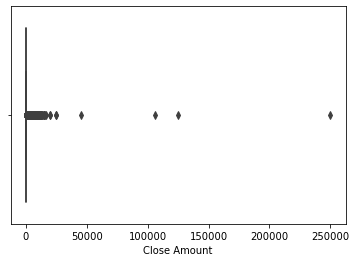

In [36]:
sns.boxplot(data = df, x = 'Close Amount');

# Cari Q1 dan Q3
# Kemudian cari IQR (Q3 - Q1)
# Outlier adalah Q3 + 1.5 X IQR

In [37]:
70 + 1.5 * 70 # untuk mencari Outlier

175.0

In [38]:
df[df['Close Amount'].between(0,175)] # Data yang bukan outlier adalah data close amount dengan biaya 0 - $175

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Specific Item,Claim Amount,Status,Close Amount,Disposition
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,DeltaAirLines,Property Damage,Checked Baggage,Luggage,100.00,Settled,50.00,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,AmericanAirlines,Property Damage,Checkpoint,Luggage,50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,DeltaAirLines,Property Damage,Checkpoint,Baby,84.79,Approved,84.79,Approve in Full
6,2007050124750,2002-04-30,2007-04-26,PHL,Philadelphia International Airport,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,106.52,Approved,106.52,Approve in Full
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Passenger Property Loss,Checkpoint,Clothing,75.00,Approved,75.00,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145136,2010010667204,2009-12-31,2009-12-12,FLL,Ft. Lauderdale-Hollywood International,AirTranAirlines,Passenger Property Loss,Checked Baggage,Luggage,12.95,Approved,12.95,Approve in Full
145138,2010010567195,2009-12-31,2009-12-14,EWR,Newark International Airport,ContinentalAirlines,Property Damage,Checked Baggage,Luggage,175.90,Denied,0.00,Deny
145139,2010010667196,2009-12-31,2009-12-17,BWI,Baltimore/Washington Intl Thurgood Marshall,SouthwestAirlines,Passenger Property Loss,Checked Baggage,Cell Phones,695.00,Denied,0.00,Deny
145140,2010010667198,2009-12-31,2009-12-15,SMF,Sacramento International Airport,SouthwestAirlines,Passenger Property Loss,Checked Baggage,Locks,25.50,Denied,0.00,Deny


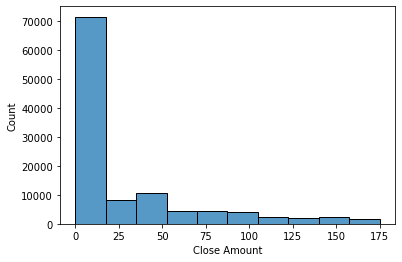

In [39]:
sns.histplot(data = df[df['Close Amount'].between(0,175)], x = 'Close Amount', bins=10);

In [40]:
df['Claim Amount'].median()

118.0

In [41]:
df['Close Amount'].describe()

count    128468.000000
mean     101.341317   
std      922.806666   
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      75.000000    
max      250000.000000
Name: Close Amount, dtype: float64

### 

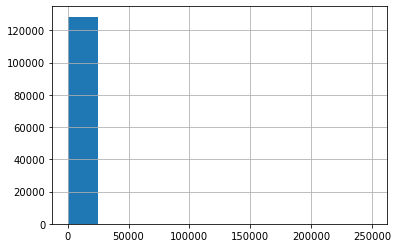

In [42]:
df['Close Amount'].hist();

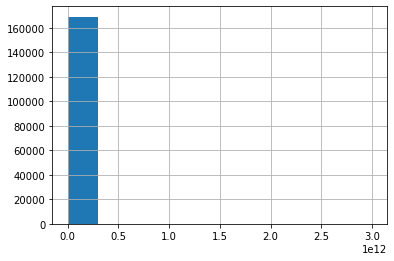

In [43]:
df['Claim Amount'].hist();

Kolom Close Amount dan Claim Amount tidak terdistribusi normal, maka dari itu isi aja dengan median

In [44]:
# Isi Claim dan Close Amount dengan Median, dan Disposition dengan Modus
df['Claim Amount'] = df['Claim Amount'].fillna(df['Claim Amount'].median())
df['Close Amount'] = df['Close Amount'].fillna(df['Close Amount'].median())
df['Disposition'] = df['Disposition'].fillna(df['Disposition'].mode()[0])

In [45]:
df.isna().sum()

Claim Number     0
Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
Specific Item    0
Claim Amount     0
Status           0
Close Amount     0
Disposition      0
dtype: int64

In [46]:
df.groupby('Status')['Close Amount'].sum()

Status
Approved    5189497.53
Denied      1012323.84
Settled     6817294.99
Name: Close Amount, dtype: float64

In [47]:
for i in df.index:
    if df.loc[i,'Status']=='Approved':
        df.loc[i,'Close Amount']=df.loc[i,'Claim Amount']
        df.loc[i,'Disposition']='Approve in Full'
    

## Data sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [48]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(169305, 13)


,dataFeatures,dataType,null,unique,uniqueSample
0,Claim Number,object,0,169305,"[2006010999112, 2007082030440]"
1,Date Received,datetime64[ns],0,3605,"[2013-01-16T00:00:00.000000000, 2011-11-24T00:00:00.000000000]"
2,Incident Date,datetime64[ns],0,4574,"[2014-05-14T00:00:00.000000000, 2002-08-08T00:00:00.000000000]"
3,Airport Code,object,0,449,"[CLT, OWB]"
4,Airport Name,object,0,449,"[Daytona Beach International, Salina Municipal Airport]"
5,Airline Name,object,0,214,"[ChinaSouthernAirlines, AeroMexico]"
6,Claim Type,object,0,9,"[Wrongful Death, Complaint]"
7,Claim Site,object,0,5,"[Checkpoint, Motor Vehicle]"
8,Specific Item,object,0,119,"[Bathroom Scales, Musical Instruments]"
9,Claim Amount,float64,0,34300,"[606.88, 1803.8]"


Sebelum dibersihkan, kita memiliki 204.267 baris data, sekarang kita memiliki 169.305 baris. Ada 26.598 (17.11%) data kosong yang dihapus dan diisi dengan data yang dirasa relevan. Kolom Date Received, Incident Date, Airport Code, Airport Name, Airline Name, Claim Type, Claim Site, Specific Item diisi menggunakan Modus dikarenakan tipe datanya yang merupakan data kategorikal. Sementara itu, kolom Claim Amount, Close Amount diisi menggunakan Median karena datanya merupakan numerikal (float) dan distribusi datanya tidak normal (skewed). 

In [49]:
df.isna().sum()

Claim Number     0
Date Received    0
Incident Date    0
Airport Code     0
Airport Name     0
Airline Name     0
Claim Type       0
Claim Site       0
Specific Item    0
Claim Amount     0
Status           0
Close Amount     0
Disposition      0
dtype: int64

In [50]:
display(df.describe(), df.describe(include='object'))

,Claim Amount,Close Amount
count,1.693050e+05,169305.000000
mean,1.774293e+07,86.731219
std,7.290991e+09,808.708778
min,0.000000e+00,0.000000
25%,2.850000e+01,0.000000
50%,1.180000e+02,0.000000
75%,3.500000e+02,59.240000
max,3.000000e+12,250000.000000


,Claim Number,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Specific Item,Status,Disposition
count,169305,169305,169305,169305,169305,169305,169305,169305,169305
unique,169305,449,449,214,9,5,119,3,3
top,0909802M,LAX,Los Angeles International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Other,Denied,Deny
freq,1,11591,11591,51144,103389,135649,36891,92247,96913


In [51]:
df = df.reset_index()

In [52]:
df = df.rename(columns={'index':'id'})

In [53]:
df.drop(columns='id', inplace=True, axis = 1)

In [54]:
## Cari Airport mana yang paling banyak orang mengajukan klaim
df_CountClaim = df['Airport Code'].value_counts().head(10).to_frame().reset_index().rename(columns = {'index' : 'Airport Code', 'Airport Code' : 'Count'})
df_CountClaim

,Airport Code,Count
0,LAX,11591
1,JFK,7484
2,ORD,6035
3,EWR,5870
4,MCO,5477
5,MIA,5282
6,ATL,4870
7,SEA,4623
8,LAS,4429
9,PHX,4268


''

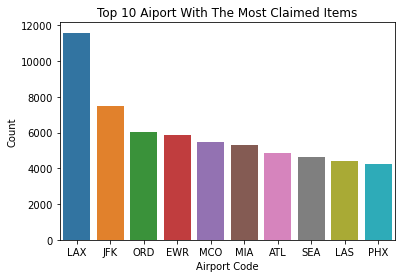

In [55]:
sns.barplot(data = df_CountClaim, x = 'Airport Code', y = 'Count')
plt.title('Top 10 Aiport With The Most Claimed Items')
;

In [56]:
stat, pvalue = f_oneway(
    df[df['Airport Code']=='LAX']['Close Amount'],
    df[df['Airport Code']=='JFK']['Close Amount'],
    df[df['Airport Code']=='ORD']['Close Amount'],
    df[df['Airport Code']=='EWR']['Close Amount'],
    df[df['Airport Code']=='MCO']['Close Amount']
)
pvalue

2.4174952469841352e-08

In [57]:
if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho.
    Kita punya cukup bukti bahwa rata-rata Close Amount dari seluruh Airport adalah sama.
    ''')
else :
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho.
    Kita punya cukup bukti bahwa minimal salah satu Close Amount pada Airport di US ada yang rata-ratanya berbeda.
    ''')


    pvalue = 2.4174952469841352e-08. pvalue <= 0.05. Reject Ho.
    Kita punya cukup bukti bahwa minimal salah satu Close Amount pada Airport di US ada yang rata-ratanya berbeda.
    


* Diatas merupakan 10 Bandara dengan pengajuan klaim barang paling banyak
* LAX merupakan bandara dengan pengajuan klaim paling banyak, kenapa ya?? 
- Bisa jadi LAX merupakan bandara yang paling sibuk di US, namun hal ini tidak bisa kita cari tahu karena datanya tidak ada di data set yang diberikan
- Ada kemungkinan juga bahwa LAX merupakan bandara dengan servis TSA yang paling buruk sehingga banyak orang kehilangan/mengalami kerusakan barang. Hal ini juga tidak bisa kita cari tahu karena kita tidak memiliki kolommnya di dataset kita.

#### Namun, kita bisa mencari tahu :
* 5 Barang yang paling sering hilang di bandara LAX
* 5 Maskapai yang paling sering kena tuduhan klaim di Bandara LAX
* Berapa Close amount yang disetujui oleh TSA di Bandara LAX

In [58]:
df_LAX = df[df['Airport Code'] == 'LAX']
df_LAX

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Specific Item,Claim Amount,Status,Close Amount,Disposition
14,15361,2002-07-15,2002-03-11,LAX,Los Angeles International Airport,DeltaAirLines,Personal Injury,Motor Vehicle,Luggage,110000.0,Denied,0.00,Deny
15,0714534M,2002-07-22,2002-03-06,LAX,Los Angeles International Airport,NorthwestAirlines,Property Damage,Other,Photographic Film,68.0,Denied,0.00,Deny
23,18170,2002-09-16,2002-08-02,LAX,Los Angeles International Airport,DeltaAirLines,Property Damage,Checked Baggage,Luggage,40.0,Approved,40.00,Approve in Full
26,18171,2002-09-16,2002-07-23,LAX,Los Angeles International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Cameras,250.0,Settled,207.99,Settle
31,16961,2002-09-18,2002-08-05,LAX,Los Angeles International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Other,175.0,Settled,171.99,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169169,2014111818414,2014-11-10,2014-10-21,LAX,Los Angeles International Airport,USAir,Passenger Property Loss,Checkpoint,Currency,0.0,Denied,0.00,Deny
169173,2014111018299,2014-11-10,2014-10-15,LAX,Los Angeles International Airport,JetBlue,Property Damage,Checkpoint,Computer,1240.0,Approved,1240.00,Approve in Full
169178,2014111718404,2014-11-11,2014-11-06,LAX,Los Angeles International Airport,AmericanAirlines,Passenger Property Loss,Checked Baggage,Travel Accessories,0.0,Denied,0.00,Deny
169265,2014121519191,2014-12-15,2014-12-02,LAX,Los Angeles International Airport,AmericanAirlines,Passenger Property Loss,Checked Baggage,Food,10.7,Approved,10.70,Approve in Full


Untuk merubah nilai Close Amount yang tidak sesuai dengan Claim Amount padahal sudah di approve. Code ini juga merubah disposition yang tidak sesuai dengan status

In [59]:
for i in df_LAX.index:
    if df_LAX.loc[i,'Status']=='Approved':
        df_LAX.loc[i,'Close Amount']=df_LAX.loc[i,'Claim Amount']
        df_LAX.loc[i,'Disposition']='Approve in Full'
    

In [60]:
df_LAX

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Specific Item,Claim Amount,Status,Close Amount,Disposition
14,15361,2002-07-15,2002-03-11,LAX,Los Angeles International Airport,DeltaAirLines,Personal Injury,Motor Vehicle,Luggage,110000.0,Denied,0.00,Deny
15,0714534M,2002-07-22,2002-03-06,LAX,Los Angeles International Airport,NorthwestAirlines,Property Damage,Other,Photographic Film,68.0,Denied,0.00,Deny
23,18170,2002-09-16,2002-08-02,LAX,Los Angeles International Airport,DeltaAirLines,Property Damage,Checked Baggage,Luggage,40.0,Approved,40.00,Approve in Full
26,18171,2002-09-16,2002-07-23,LAX,Los Angeles International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Cameras,250.0,Settled,207.99,Settle
31,16961,2002-09-18,2002-08-05,LAX,Los Angeles International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Other,175.0,Settled,171.99,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169169,2014111818414,2014-11-10,2014-10-21,LAX,Los Angeles International Airport,USAir,Passenger Property Loss,Checkpoint,Currency,0.0,Denied,0.00,Deny
169173,2014111018299,2014-11-10,2014-10-15,LAX,Los Angeles International Airport,JetBlue,Property Damage,Checkpoint,Computer,1240.0,Approved,1240.00,Approve in Full
169178,2014111718404,2014-11-11,2014-11-06,LAX,Los Angeles International Airport,AmericanAirlines,Passenger Property Loss,Checked Baggage,Travel Accessories,0.0,Denied,0.00,Deny
169265,2014121519191,2014-12-15,2014-12-02,LAX,Los Angeles International Airport,AmericanAirlines,Passenger Property Loss,Checked Baggage,Food,10.7,Approved,10.70,Approve in Full


5 Tanggal dengan incident terbanyak di Bandara LAX

In [61]:
df_LAX['Incident Date'].value_counts().head(5).to_frame()

,Incident Date
2003-06-30,24
2003-09-27,22
2003-08-09,22
2003-10-17,22
2003-09-07,22


Ini merupakan tanggal - tangal musim summerbreak

In [62]:
df_LAX['Specific Item'].value_counts().head(10).to_frame()

,Specific Item
Other,2826
Luggage,1546
Clothing,1198
Cameras,1026
Computer,966
Jewelry,815
Locks,624
Cosmetics,310
Baggage/Cases/Purses,266
Currency,264


Sangat banyak data yang `other`, hal ini disebabkan karena pencatatan yang tidak tekun. Saran saya adalah untuk diperbaikin pencatatannya sehingga kolom data barang hilang akan lebih baik daripada sebelumnya

### Berikut merupakan 5 barang yang paling sering diajukan klaim di Bandara LAX 

In [63]:
BarangHilangdiLAX = df_LAX['Specific Item'].value_counts().head(6).to_frame().iloc[1:6]

In [64]:
BarangHilangdiLAX = BarangHilangdiLAX.reset_index()
BarangHilangdiLAX

,index,Specific Item
0,Luggage,1546
1,Clothing,1198
2,Cameras,1026
3,Computer,966
4,Jewelry,815


In [65]:
BarangHilangdiLAX = BarangHilangdiLAX.rename(columns = {'index' : 'Barang', 'Specific Item' : 'Jumlah'})
BarangHilangdiLAX

,Barang,Jumlah
0,Luggage,1546
1,Clothing,1198
2,Cameras,1026
3,Computer,966
4,Jewelry,815


''

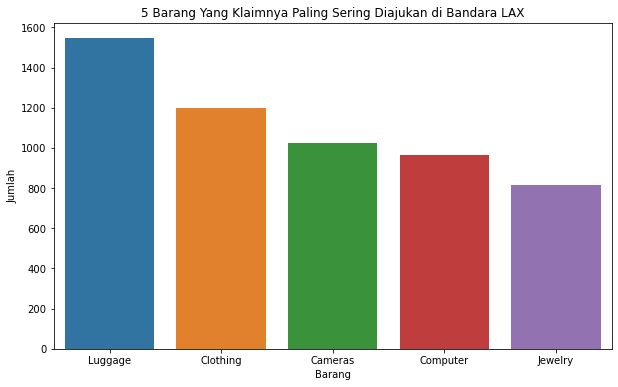

In [66]:
plt.figure(figsize = (10,6))
sns.barplot(data = BarangHilangdiLAX, x = 'Barang', y = 'Jumlah')
plt.title('5 Barang Yang Klaimnya Paling Sering Diajukan di Bandara LAX')
;

### Sekarang mari kita lakukan analisis mengenai maskapai yang paling sering diajukan klaim oleh pengguna di Bandara LAX

In [67]:
Maskapai = df_LAX['Airline Name'].value_counts().head(5).to_frame()
Maskapai

,Airline Name
DeltaAirLines,4516
AmericanAirlines,1403
UAL,1343
SouthwestAirlines,704
AlaskaAirlines,678


In [68]:
Maskapai = Maskapai.reset_index()
Maskapai

,index,Airline Name
0,DeltaAirLines,4516
1,AmericanAirlines,1403
2,UAL,1343
3,SouthwestAirlines,704
4,AlaskaAirlines,678


In [69]:
Maskapai = Maskapai.rename(columns = {'index' : 'Maskapai Penerbangan', 'Airline Name' : 'Jumlah Klaim Diajukan'})
Maskapai

,Maskapai Penerbangan,Jumlah Klaim Diajukan
0,DeltaAirLines,4516
1,AmericanAirlines,1403
2,UAL,1343
3,SouthwestAirlines,704
4,AlaskaAirlines,678


''

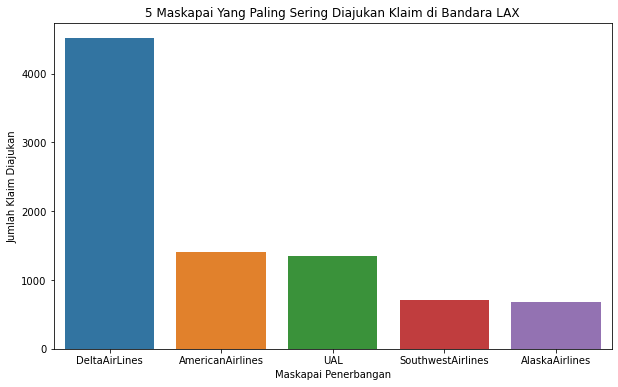

In [70]:
plt.figure(figsize = (10,6))
sns.barplot(data = Maskapai, x = 'Maskapai Penerbangan', y = 'Jumlah Klaim Diajukan')
plt.title('5 Maskapai Yang Paling Sering Diajukan Klaim di Bandara LAX')
;

In [71]:
dfdesc = df[['Close Amount','Airport Code']].groupby(['Airport Code']).describe().head(5)
dfdesc
# dfdesc.head(10).sort_values('mean', ascending = False)

Close Amount                                                 \
                    count       mean         std  min  25%   50%     75%   
Airport Code                                                               
ABE           117.0        80.290000  234.731136  0.0  0.0  20.0  75.000   
ABI           37.0         56.954595  127.468119  0.0  0.0  0.0   26.990   
ABQ           835.0        76.627964  270.754951  0.0  0.0  6.4   62.840   
ABR           27.0         43.607778  124.631542  0.0  0.0  0.0   47.975   
ABY           35.0         47.166571  152.909087  0.0  0.0  0.0   10.000   

                       
                  max  
Airport Code           
ABE           2287.89  
ABI           531.68   
ABQ           5950.00  
ABR           642.50   
ABY           835.95

In [72]:
df.groupby('Airport Code').mean()[['Close Amount']].sort_values(by='Close Amount',ascending=False).reset_index().iloc[3:10]

,Airport Code,Close Amount
3,ENV,604.464000
4,CDR,585.143333
5,BMI,547.625192
6,ACK,388.761667
7,GSN,296.670000
8,MLU,290.391250
9,HDQ,280.820000


In [73]:
df.groupby('Airport Code').mean()[['Close Amount']].sort_values(by='Close Amount',ascending=False).reset_index()[df.groupby('Airport Code').mean()[['Close Amount']].sort_values(by='Close Amount',ascending=False).reset_index()['Airport Code']=='LAX']

,Airport Code,Close Amount
46,LAX,103.379358


In [74]:
dfdesc.mean()

Close Amount  count    210.200000 
              mean     60.929382  
              std      182.098967 
              min      0.000000   
              25%      0.000000   
              50%      5.280000   
              75%      44.561000  
              max      2049.604000
dtype: float64

In [75]:
## Cari Airport yang paling banyak mengalami insiden dengan menggunakan kolom airport name dan incident date
# df['Airport_yang_mengalami_banyak_insiden'] = df.groupby('')

In [76]:
df_CountClaim

,Airport Code,Count
0,LAX,11591
1,JFK,7484
2,ORD,6035
3,EWR,5870
4,MCO,5477
5,MIA,5282
6,ATL,4870
7,SEA,4623
8,LAS,4429
9,PHX,4268


In [77]:
df_ClaimAmount = df_LAX.groupby('Specific Item').mean()['Claim Amount'].to_frame().sort_values('Claim Amount', ascending = False).reset_index().iloc[1:11]
df_ClaimAmount

,Specific Item,Claim Amount
1,Currency,380033.962121
2,Artificial flowers,10920.600000
3,Bicycles,3645.522500
4,Wigs,3000.000000
5,Audio,2262.725455
6,Medical Equipment,2205.060000
7,Jewelry,2118.786601
8,Computer,1392.018851
9,Watches,1263.668333
10,Calculators,1148.500000


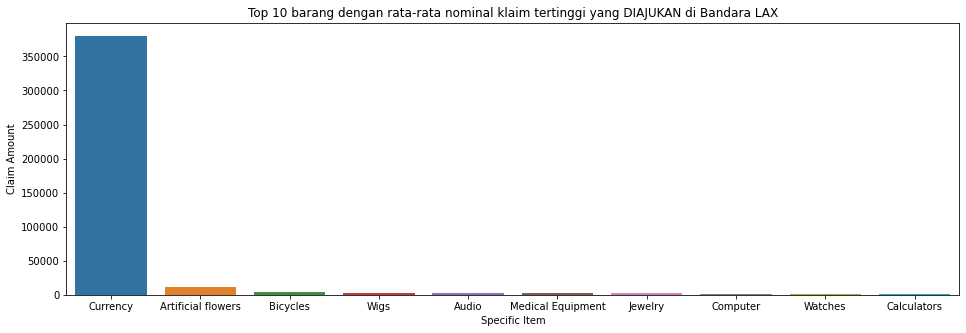

In [78]:
plt.figure(figsize = (16,5))
sns.barplot(data = df_ClaimAmount, x = 'Specific Item', y = 'Claim Amount')
plt.title('Top 10 barang dengan rata-rata nominal klaim tertinggi yang DIAJUKAN di Bandara LAX');

In [79]:
df_CloseAmount = df_LAX.groupby('Specific Item').mean()['Close Amount'].to_frame().sort_values('Close Amount', ascending = False).reset_index().iloc[1:11]
df_CloseAmount

,Specific Item,Close Amount
1,Medical Equipment,794.904000
2,Baskets,250.000000
3,Computer,229.181035
4,Sporting Equipment,223.494848
5,Jewelry,172.491730
6,Musical Instruments,156.804808
7,Baby,155.289216
8,Eyeglasses,153.175312
9,PDA,147.465641
10,Dental Equipment and Instruments,133.662500


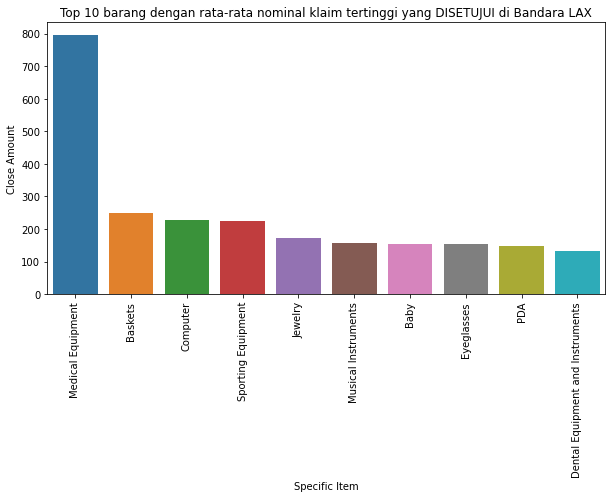

In [80]:
plt.figure(figsize = (10,5))
sns.barplot(data = df_CloseAmount, x = 'Specific Item', y = 'Close Amount')
plt.title('Top 10 barang dengan rata-rata nominal klaim tertinggi yang DISETUJUI di Bandara LAX')
plt.xticks(rotation = 90);

''

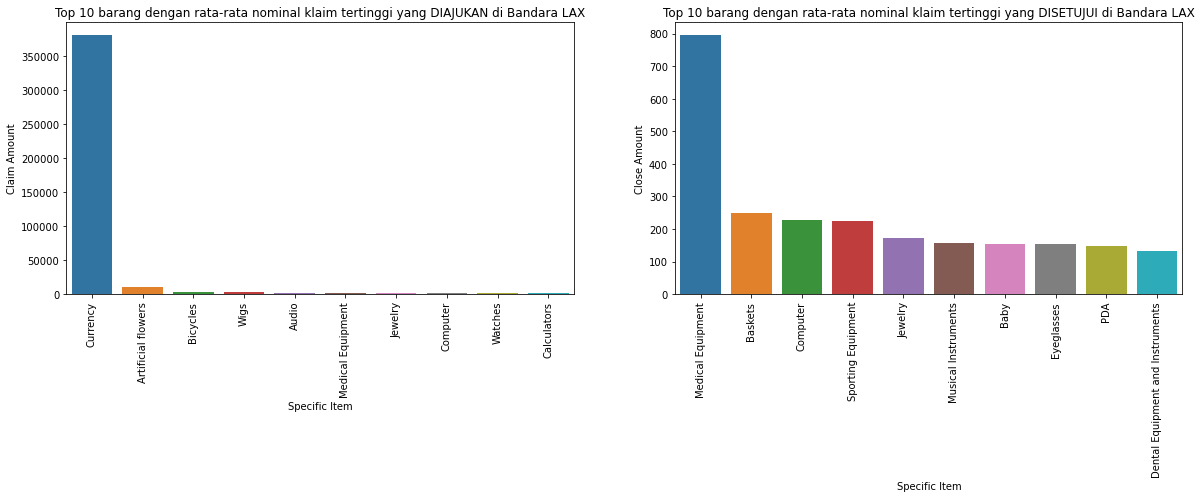

In [81]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.barplot(data = df_ClaimAmount, x = 'Specific Item', y = 'Claim Amount')
plt.title('Top 10 barang dengan rata-rata nominal klaim tertinggi yang DIAJUKAN di Bandara LAX')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(data = df_CloseAmount, x = 'Specific Item', y = 'Close Amount')
plt.title('Top 10 barang dengan rata-rata nominal klaim tertinggi yang DISETUJUI di Bandara LAX')
plt.xticks(rotation = 90)
;

### Berdasarkan analisis diatas, 5 Specific Item dengan Claim Amount tertinggi  sama sekali tidak masuk kedalam Close Amount. Hal ini bisa kita asumsikan bahwa ke 5 Item tersebut memiliki rerata nominal yang diapproved sangat kecil oleh TSA.

In [82]:
df_LAX.groupby('Specific Item').mean().sort_values(by = 'Claim Amount', ascending = False).iloc[1:6]

,Claim Amount,Close Amount
Specific Item,,
Currency,380033.962121,95.155606
Artificial flowers,10920.600000,0.000000
Bicycles,3645.522500,1154.995000
Wigs,3000.000000,0.000000
Audio,2262.725455,98.898182


In [83]:
df_LAX[df_LAX['Specific Item'] == 'Currency'].sort_values(by = 'Close Amount', ascending = False)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Specific Item,Claim Amount,Status,Close Amount,Disposition
38259,2004103165987,2004-09-16,2004-09-06,LAX,Los Angeles International Airport,UAL,Passenger Property Loss,Checked Baggage,Currency,2602.83,Approved,2602.83,Approve in Full
2926,0324019L,2003-03-24,2003-03-10,LAX,Los Angeles International Airport,AirTranAirlines,Passenger Property Loss,Checked Baggage,Currency,5025.00,Settled,2500.00,Settle
74815,2006051506275,2006-05-11,2006-03-16,LAX,Los Angeles International Airport,BritishAirways,Passenger Property Loss,Checkpoint,Currency,1252.42,Settled,1000.00,Settle
95520,2007072729244,2007-07-25,2007-07-22,LAX,Los Angeles International Airport,UAL,Passenger Property Loss,Checked Baggage,Currency,1000.00,Approved,1000.00,Approve in Full
20865,2004072159853,2004-01-15,2004-10-31,LAX,Los Angeles International Airport,DeltaAirLines,Passenger Property Loss,Checkpoint,Currency,1000.00,Approved,1000.00,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,0123002L,2003-01-23,2003-01-13,LAX,Los Angeles International Airport,DeltaAirLines,Property Damage,Checkpoint,Currency,175.00,Denied,0.00,Deny
61263,2005082591432,2005-08-19,2005-07-22,LAX,Los Angeles International Airport,NorthwestAirlines,Passenger Property Loss,Checked Baggage,Currency,625.00,Denied,0.00,Deny
62063,2005091492498,2005-09-06,2005-08-30,LAX,Los Angeles International Airport,AirCanada,Passenger Property Loss,Checked Baggage,Currency,1090.00,Denied,0.00,Deny
63313,2005100393710,2005-09-26,2005-09-03,LAX,Los Angeles International Airport,UAL,Passenger Property Loss,Checked Baggage,Currency,200.00,Denied,0.00,Deny


Chi-square : Apakah airport code berhubungan dengan claim type?
H0 = disemua airport code, proporsi claim typenya sama
H1 = proporsi claim typenya berbeda

In [84]:
df_LAX

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Specific Item,Claim Amount,Status,Close Amount,Disposition
14,15361,2002-07-15,2002-03-11,LAX,Los Angeles International Airport,DeltaAirLines,Personal Injury,Motor Vehicle,Luggage,110000.0,Denied,0.00,Deny
15,0714534M,2002-07-22,2002-03-06,LAX,Los Angeles International Airport,NorthwestAirlines,Property Damage,Other,Photographic Film,68.0,Denied,0.00,Deny
23,18170,2002-09-16,2002-08-02,LAX,Los Angeles International Airport,DeltaAirLines,Property Damage,Checked Baggage,Luggage,40.0,Approved,40.00,Approve in Full
26,18171,2002-09-16,2002-07-23,LAX,Los Angeles International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Cameras,250.0,Settled,207.99,Settle
31,16961,2002-09-18,2002-08-05,LAX,Los Angeles International Airport,DeltaAirLines,Passenger Property Loss,Checked Baggage,Other,175.0,Settled,171.99,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169169,2014111818414,2014-11-10,2014-10-21,LAX,Los Angeles International Airport,USAir,Passenger Property Loss,Checkpoint,Currency,0.0,Denied,0.00,Deny
169173,2014111018299,2014-11-10,2014-10-15,LAX,Los Angeles International Airport,JetBlue,Property Damage,Checkpoint,Computer,1240.0,Approved,1240.00,Approve in Full
169178,2014111718404,2014-11-11,2014-11-06,LAX,Los Angeles International Airport,AmericanAirlines,Passenger Property Loss,Checked Baggage,Travel Accessories,0.0,Denied,0.00,Deny
169265,2014121519191,2014-12-15,2014-12-02,LAX,Los Angeles International Airport,AmericanAirlines,Passenger Property Loss,Checked Baggage,Food,10.7,Approved,10.70,Approve in Full


Dibawah ini saya akan melakukan korelasi antara kolom claim amount dengan kolom close amount

In [85]:
df_LAX.corr()

,Claim Amount,Close Amount
Claim Amount,1.000000,-0.003029
Close Amount,-0.003029,1.000000


Tidak ada hubungan antara claim amount dengan close amount.
Artinya ketika kita mengajukan claim belum tentu disetujui dengan nominal yang kita ajukan. Bisa saja disettle, atau tidak diapproved sama sekali. Namun dari hasil korelasi ini, sebagian besar orang yang mengajukan claim, tidak diapprove.